In [34]:
import cobra
from cobra.io import load_model
from pathlib import Path
from cobra.io import load_json_model, save_json_model, load_matlab_model, save_matlab_model, read_sbml_model, write_sbml_model
import logging
import pandas as pd
from cobra import Model, Reaction, Metabolite
from cobra.io import write_sbml_model, validate_sbml_model
from cobra.flux_analysis import flux_variability_analysis

%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris
pvulModel=read_sbml_model('pvulModel_lightCT+1.0.xml')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris


In [43]:
for i in pvulModel.metabolites.get_by_id('OXYGEN-MOLECULE[c]').reactions:
    for j in i.products:
        if j.id=='OXYGEN-MOLECULE[c]':
            print(i.id)

Trans_EX_OXYGEN-MOLECULE[e]
CATAL-RXN
PSII-RXN


## LINAMARIN

### P. VULGARIS CONDITIONS

In [28]:
pvulModel.reactions.get_by_id('RXN-5063').bounds = (0, 333)
pvulModel.reactions.get_by_id('RXN-5064').bounds = (0, 333)
pvulModel.reactions.get_by_id('RXN-5065').bounds = (0, 333)
pvulModel.reactions.get_by_id('RXN-5066').bounds = (0, 272)
pvulModel.reactions.get_by_id('RXN-5081').bounds = (0, 272)
pvulModel.reactions.get_by_id('RXN-5082').bounds = (0, 272)
pvulModel.reactions.get_by_id('LINAMARIN-RXN').bounds = (0, 444)


In [30]:
pvulModel.objective = 'LINAMARIN-RXN'
solution=pvulModel.optimize()
solution.objective_value

272.0000000000003

In [37]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA
df=pd.DataFrame(solution.fluxes)
df.to_csv('FBA_plun_linamarin.csv')



C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA


In [25]:
solution.fluxes['SUCROSE-PHOSPHATASE-RXN']	

2.1540663074678836e-14

### P. LUNATUS CONDITIONS

In [35]:
pvulModel.reactions.get_by_id('RXN-5063').bounds = (0, 500)
pvulModel.reactions.get_by_id('RXN-5064').bounds = (0, 500)
pvulModel.reactions.get_by_id('RXN-5065').bounds = (0, 500)
pvulModel.reactions.get_by_id('RXN-5066').bounds = (0, 500)
pvulModel.reactions.get_by_id('RXN-5081').bounds = (0, 500)
pvulModel.reactions.get_by_id('RXN-5082').bounds = (0, 500)
pvulModel.reactions.get_by_id('LINAMARIN-RXN').bounds = (0,500)

In [13]:
pvulModel.objective = 'LINAMARIN-RXN'
solution=pvulModel.optimize()
solution.objective_value

416.6666666666648

In [273]:
pvulModel.objective = 'RXN-9643'
solution=pvulModel.optimize()
solution.objective_value

416.6666666666666

### DAY TEST

In [36]:
pvulModel.reactions.get_by_id('EX_OXYGEN-MOLECULE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_OXYGEN-MOLECULE[e]').upper_bound =0
pvulModel.reactions.get_by_id('demandLight').lower_bound =0
pvulModel.reactions.get_by_id('demandLight').upper_bound =1000
pvulModel.reactions.get_by_id('EX_CARBON-DIOXIDE[e]').lower_bound =0
pvulModel.reactions.get_by_id('EX_CARBON-DIOXIDE[e]').upper_bound =1000
pvulModel.reactions.get_by_id('EX_SUCROSE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_SUCROSE[e]').upper_bound = 0
pvulModel.reactions.get_by_id('EX_BETA-D-FRUCTOSE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_BETA-D-FRUCTOSE[e]').upper_bound =0

#### P. VULGARIS

In [203]:
### DAY
pvulModel.objective = 'LINAMARIN-RXN'
solution=pvulModel.optimize()
solution.objective_value

271.99999999999994

In [ ]:
pvulModel.summary()

In [65]:
pvulDay_Linamarin=flux_variability_analysis(pvulModel)

In [66]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN
pvulDay_Linamarin.to_csv('pvulDay_Linamarin_4.0.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN


In [89]:
# critical=getCriticalRxns(pvulDay_Linamarin)

# df = pd.DataFrame.from_dict(critical, orient='index', columns=['value'])
# df.to_csv('pvulDay_Linamarin_Critical.csv',decimal=',',sep=';')

In [197]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN
Pvul_Day_Linamarin_magnitudes=getMagnitude(pvulDay_Linamarin)

# dfPvul=pd.DataFrame(list(Pvul_Day_Linamarin_magnitudes.items()), columns=['RXN','Plun'])
# dfPvul.to_csv('FVA_Pvul_Day_Linamarin_4.0.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN


In [ ]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN
import matplotlib.pyplot as plt
length=list(range(len(Pvul_Day_Linamarin_magnitudes)))
plt.figure(figsize=(10, 6))
plt.scatter(length, Pvul_Day_Linamarin_magnitudes.values(),color='#782862',s=10)
plt.savefig('scatternplot_Pvul_Day_Linamarin.jpg', dpi=300, bbox_inches='tight')


#### P.LUNATUS

In [287]:
### DAY
pvulModel.objective = 'LINAMARIN-RXN'
solution=pvulModel.optimize()
solution.objective_value

416.6666666666666

In [286]:
pvulModel.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
CIT[e],EX_CIT[e],103.4,6,6.50%
MAL[e],EX_MAL[e],1000,4,41.86%
OXYGEN-MOLECULE[e],EX_OXYGEN-MOLECULE[e],1000,0,0.00%
PYRIDOXAL_PHOSPHATE[e],EX_PYRIDOXAL_PHOSPHATE[e],356.3,8,29.83%
VAL[e],EX_VAL[e],416.7,5,21.80%
Light[c],demandLight,1000,0,0.00%
Oxidized-Plastocyanins[e],demandPlastocyanins,1000,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
CARBON-DIOXIDE[e],EX_CARBON-DIOXIDE[e],-1000,1,10.47%
GLC[e],EX_GLC[e],-90.52,6,5.68%


In [188]:
plunDay_Linamarin=flux_variability_analysis(pvulModel)

In [274]:
plunDay_Lotaustralin=flux_variability_analysis(pvulModel)

In [282]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LOTAUSTRALIN
plunDay_Lotaustralin.to_csv('plunDay_Lotaustralin_1.0.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LOTAUSTRALIN


In [275]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN
plunDay_Linamarin.to_csv('plunDay_Linamarin_4.0.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN


In [108]:
critical=getCriticalRxns(plunDay_Linamarin)

df = pd.DataFrame.from_dict(critical, orient='index', columns=['value'])
df.to_csv('plunDay_Linamarin_Critical.csv',decimal=',',sep=';')

##### FLUXES FVA PLUN

In [189]:
Plun_Day_Linamarin_magnitudes=getMagnitude(plunDay_Linamarin)


In [276]:
Plun_Day_Lotaustralin_magnitudes=getMagnitude(plunDay_Lotaustralin)


In [277]:
len(Plun_Day_Lotaustralin_magnitudes)

1097

In [67]:
# df_plot=pd.DataFrame({'Pvul':Pvul_Day_Linamarin_magnitudes.values(),'Plun':Plun_Day_Linamarin_magnitudes.values()},index=Pvul_Day_Linamarin_magnitudes.keys())
# length1=list(range(len(Pvul_Day_Linamarin_magnitudes)))
# length2=list(range(len(Plun_Day_Linamarin_magnitudes)))

# df_plot=pd.DataFrame({'Index':length1,'Fluxes':Pvul_Day_Linamarin_magnitudes.values(),'Especies':['P_vulgaris']*len(Pvul_Day_Linamarin_magnitudes.keys())})
# df_new_rows=pd.DataFrame({'Index':length2,'Fluxes':Plun_Day_Linamarin_magnitudes.values(),'Especies':['P_lunatus']*len(Plun_Day_Linamarin_magnitudes.keys())})
# df_plot=pd.concat([df_plot,df_new_rows])
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=df_plot, x="Index", y="Fluxes", hue="Especies",style="Especies")

In [ ]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN

import seaborn as sns
import matplotlib.pyplot as plt
length=list(range(len(Plun_Day_Linamarin_magnitudes)))
plt.figure(figsize=(10, 6))
plt.scatter(length, Plun_Day_Linamarin_magnitudes.values(),color='#267D49',s=10)
plt.savefig('scatternplot_Plun_Day_Linamarin.jpg', dpi=300, bbox_inches='tight')




C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN


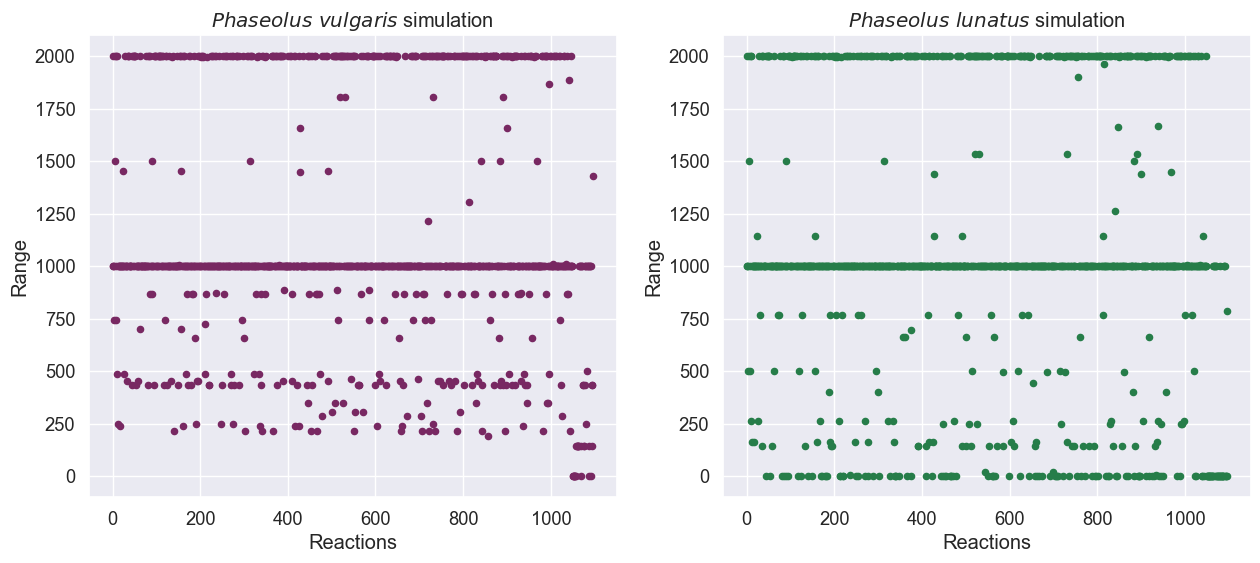

In [281]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN

import matplotlib.pyplot as plt
import seaborn as sns
lengthpvul=list(range(len(Pvul_Day_Linamarin_magnitudes)))
# fig1,ax1=plt.subplots(figsize=(10, 6))
# ax1.scatter(lengthpvul, Pvul_Day_Linamarin_magnitudes.values(),color='#782862',s=10)
# #plt.savefig('scatternplot_Pvul_Day_Linamarin.jpg', dpi=300, bbox_inches='tight')

# Plun_Day_Linamarin_magnitudes=getMagnitude(plunDay_Linamarin)
# lengthplun=list(range(len(Plun_Day_Linamarin_magnitudes)))
# fig2,ax2=plt.subplots(figsize=(10, 6))
# ax2.scatter(lengthplun, Plun_Day_Linamarin_magnitudes.values(),color='#267D49',s=10)
# #plt.savefig('scatternplot_Plun_Day_Linamarin.jpg', dpi=300, bbox_inches='tight')

# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].scatter(lengthpvul, Pvul_Day_Linamarin_magnitudes.values(), color='#782862', s=20)
axs[0].set_title(r'$\it{Phaseolus\ vulgaris}$ simulation')
axs[0].set_xlabel('Reactions')
axs[0].set_ylabel('Range')

# Add the second plot to the second column of subplots
axs[1].scatter(lengthplun, Plun_Day_Linamarin_magnitudes.values(), color='#267D49', s=20)
axs[1].set_title(r'$\it{Phaseolus\ lunatus}$ simulation')
axs[1].set_xlabel('Reactions')
axs[1].set_ylabel('Range')

sns.set(font_scale=1.2)
plt.savefig('scatterplots_Pvul_Day_Linamarin_4.0.jpg', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN


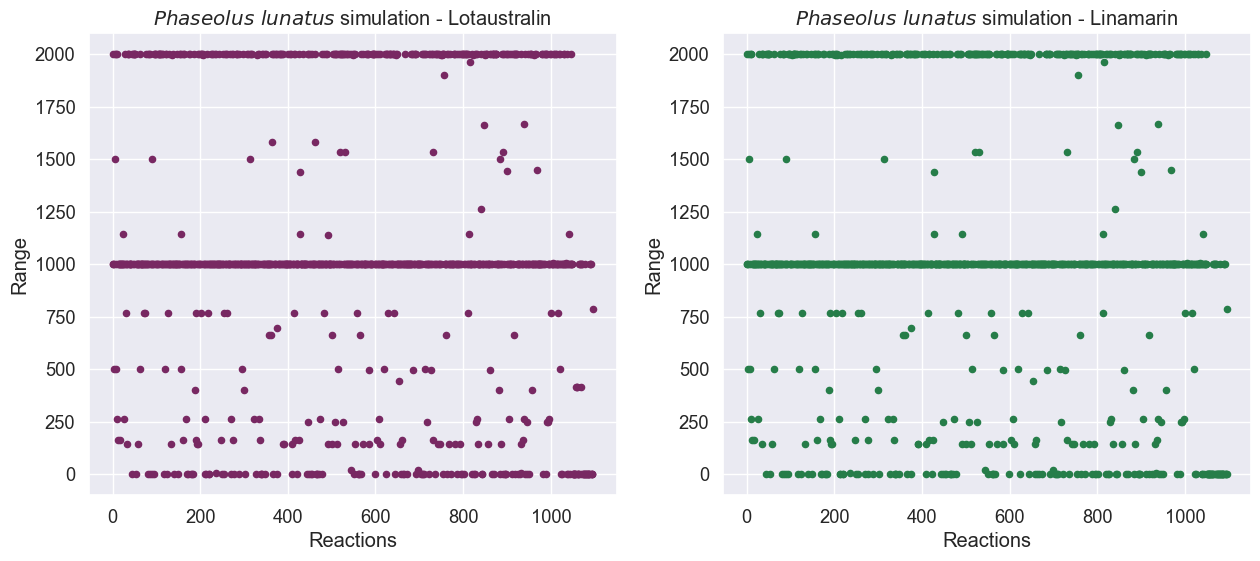

In [280]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN

import matplotlib.pyplot as plt
import seaborn as sns
lengthpvul=list(range(len(Pvul_Day_Linamarin_magnitudes)))
# fig1,ax1=plt.subplots(figsize=(10, 6))
# ax1.scatter(lengthpvul, Pvul_Day_Linamarin_magnitudes.values(),color='#782862',s=10)
# #plt.savefig('scatternplot_Pvul_Day_Linamarin.jpg', dpi=300, bbox_inches='tight')

# Plun_Day_Linamarin_magnitudes=getMagnitude(plunDay_Linamarin)
# lengthplun=list(range(len(Plun_Day_Linamarin_magnitudes)))
# fig2,ax2=plt.subplots(figsize=(10, 6))
# ax2.scatter(lengthplun, Plun_Day_Linamarin_magnitudes.values(),color='#267D49',s=10)
# #plt.savefig('scatternplot_Plun_Day_Linamarin.jpg', dpi=300, bbox_inches='tight')

# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].scatter(lengthpvul, Plun_Day_Lotaustralin_magnitudes.values(), color='#782862', s=20)
axs[0].set_title(r'$\it{Phaseolus\ lunatus}$ simulation - Lotaustralin')
axs[0].set_xlabel('Reactions')
axs[0].set_ylabel('Range')

# Add the second plot to the second column of subplots
axs[1].scatter(lengthplun, Plun_Day_Linamarin_magnitudes.values(), color='#267D49', s=20)
axs[1].set_title(r'$\it{Phaseolus\ lunatus}$ simulation - Linamarin')
axs[1].set_xlabel('Reactions')
axs[1].set_ylabel('Range')

sns.set(font_scale=1.2)
plt.savefig('scatterplots_Pvul_Day_lotaustralin_4.0.jpg', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN


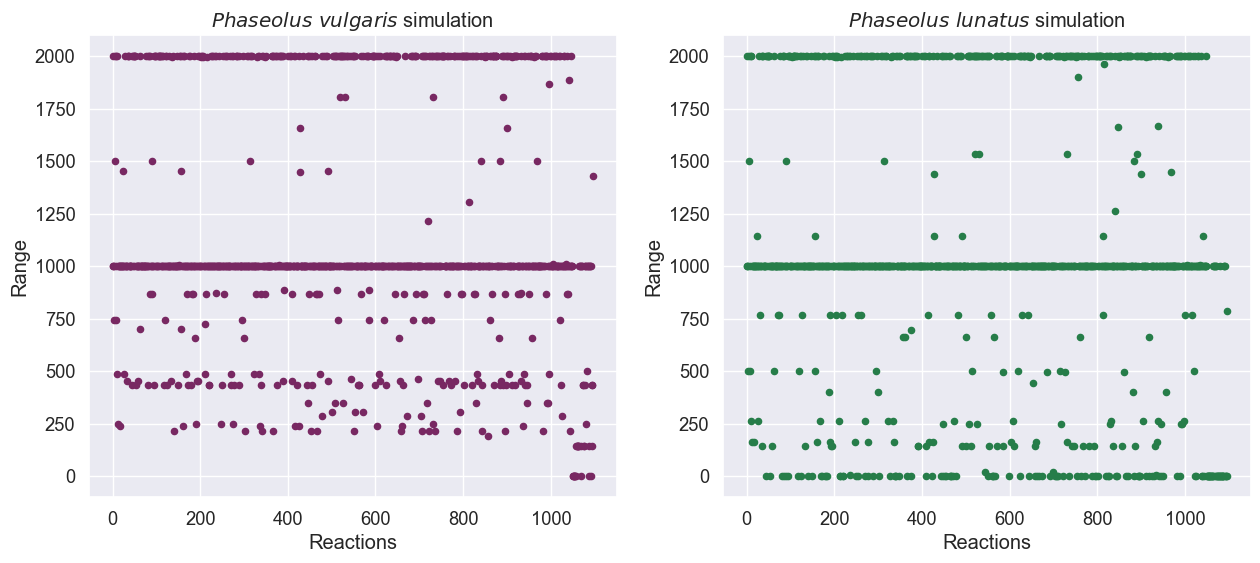

In [302]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN

import matplotlib.pyplot as plt
import seaborn as sns
lengthpvul=list(range(len(Pvul_Day_Linamarin_magnitudes)))
# fig1,ax1=plt.subplots(figsize=(10, 6))
# ax1.scatter(lengthpvul, Pvul_Day_Linamarin_magnitudes.values(),color='#782862',s=10)
# #plt.savefig('scatternplot_Pvul_Day_Linamarin.jpg', dpi=300, bbox_inches='tight')

# Plun_Day_Linamarin_magnitudes=getMagnitude(plunDay_Linamarin)
# lengthplun=list(range(len(Plun_Day_Linamarin_magnitudes)))
# fig2,ax2=plt.subplots(figsize=(10, 6))
# ax2.scatter(lengthplun, Plun_Day_Linamarin_magnitudes.values(),color='#267D49',s=10)
# #plt.savefig('scatternplot_Plun_Day_Linamarin.jpg', dpi=300, bbox_inches='tight')

# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].scatter(lengthpvul, Pvul_Day_Linamarin_magnitudes.values(), color='#782862', s=20)
axs[0].set_title(r'$\it{Phaseolus\ vulgaris}$ simulation')
axs[0].set_xlabel('Reactions')
axs[0].set_ylabel('Range')

# Add the second plot to the second column of subplots
axs[1].scatter(lengthplun, Plun_Day_Linamarin_magnitudes.values(), color='#267D49', s=20)
axs[1].set_title(r'$\it{Phaseolus\ lunatus}$ simulation')
axs[1].set_xlabel('Reactions')
axs[1].set_ylabel('Range')

sns.set(font_scale=1.2)
plt.savefig('scatterplots_Pvul_Day_Linamarin_4.0.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
###----------------------- LINAMARIN --------------------------------###

%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN

# dfPvul = pd.DataFrame(list(Pvul_Day_Linamarin_magnitudes.items()), columns=['RXN','Pvul'])
dfPlun=pd.DataFrame(list(Plun_Day_Linamarin_magnitudes.items()), columns=['RXN','Plun'])
# dfPvul.to_csv('FVA_Pvul_Day_Linamarin.csv',decimal=',',sep=';')
dfPlun.to_csv('FVA_Plun_Day_Linamarin_4.0.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN


In [278]:
###----------------------- LOTAUSTRALIN --------------------------------###
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LOTAUSTRALIN

# dfPvul = pd.DataFrame(list(Pvul_Day_Linamarin_magnitudes.items()), columns=['RXN','Pvul'])
dfPlun=pd.DataFrame(list(Plun_Day_Lotaustralin_magnitudes.items()), columns=['RXN','Plun'])
# dfPvul.to_csv('FVA_Pvul_Day_Linamarin.csv',decimal=',',sep=';')
dfPlun.to_csv('FVA_Plun_Day_Lotraustralin_1.0.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LOTAUSTRALIN


In [301]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA
sol=pvulModel.optimize()
df=pd.DataFrame(sol.fluxes)
df_to_csv=df.to_csv('FBA_fluxes_linamarin.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA


In [307]:
pvulModel.reactions.get_by_id('EX_CIT[e]')

Reaction identifier,EX_CIT[e]
Name,citrate exchange
Memory address,0x21f16b9a770
Stoichiometry,CIT[e] <=> citrate <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


### NIGHT TEST

In [258]:
pvulModel.reactions.get_by_id('EX_OXYGEN-MOLECULE[e]').lower_bound =0
pvulModel.reactions.get_by_id('EX_OXYGEN-MOLECULE[e]').upper_bound =1000
pvulModel.reactions.get_by_id('demandLight').lower_bound =0
pvulModel.reactions.get_by_id('demandLight').upper_bound =0
pvulModel.reactions.get_by_id('EX_CARBON-DIOXIDE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_CARBON-DIOXIDE[e]').upper_bound =0
pvulModel.reactions.get_by_id('EX_SUCROSE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_SUCROSE[e]').upper_bound =1000
pvulModel.reactions.get_by_id('EX_BETA-D-FRUCTOSE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_BETA-D-FRUCTOSE[e]').upper_bound =1000

#### P. VULGARIS

In [150]:
### Night
pvulModel.objective = 'LINAMARIN-RXN'
solution=pvulModel.optimize()
solution.objective_value

0.0

In [94]:
pvulNight_Linamarin=flux_variability_analysis(pvulModel)

In [95]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN
pvulNight_Linamarin.to_csv('pvulNight_Linamarin.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN


In [96]:
critical=getCriticalRxns(pvulNight_Linamarin)

df = pd.DataFrame.from_dict(critical, orient='index', columns=['value'])
df.to_csv('pvulNight_Linamarin_Critical.csv',decimal=',',sep=';')

#### P.LUNATUS

In [259]:
### Night
pvulModel.objective = 'LINAMARIN-RXN'
solution=pvulModel.optimize()
solution.objective_value

333.3333333333332

In [260]:
pvulModel.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
OXYGEN-MOLECULE[e],EX_OXYGEN-MOLECULE[e],1000,0,0.00%
PYRIDOXAL_PHOSPHATE[e],EX_PYRIDOXAL_PHOSPHATE[e],90.91,8,11.37%
SUCROSE[e],EX_SUCROSE[e],333.3,12,62.56%
VAL[e],EX_VAL[e],333.3,5,26.07%
Metabolite,Reaction,Flux,C-Number,C-Flux
BETA-D-FRUCTOSE[e],EX_BETA-D-FRUCTOSE[e],-333.3,6,31.28%
CARBON-DIOXIDE[e],EX_CARBON-DIOXIDE[e],-787.9,1,12.32%
PROTON[e],EX_PROTON[e],-666.7,0,0.00%
Pi[e],EX_Pi[e],-90.91,0,0.00%
SER[e],EX_SER[e],-90.91,3,4.27%


In [75]:
plunNight_Linamarin=flux_variability_analysis(pvulModel)

In [76]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN
plunNight_Linamarin.to_csv('plunNight_Linamarin_4.0.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN


In [77]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN

Plun_Night_Linamarin_magnitudes=getMagnitude(plunNight_Linamarin)
# dfPvul = pd.DataFrame(list(Pvul_Day_Linamarin_magnitudes.items()), columns=['RXN','Pvul'])
dfPlunNight=pd.DataFrame(list(Plun_Night_Linamarin_magnitudes.items()), columns=['RXN','Plun'])
# dfPvul.to_csv('FVA_Pvul_Day_Linamarin.csv',decimal=',',sep=';')
dfPlunNight.to_csv('FVA_Plun_Night_Linamarin_4.0.csv',decimal=',',sep=';')


C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN


In [115]:
critical=getCriticalRxns(plunNight_Linamarin)

df = pd.DataFrame.from_dict(critical, orient='index', columns=['value'])
df.to_csv('plunNight_Linamarin_Critical.csv',decimal=',',sep=';')

### SUPPORT

In [51]:
def getMagnitude(fva):
    
    pvulfva_day_linamarin={}
    for index,row in fva.iterrows():
        value=(int(row['minimum'])),(int(row['maximum']))
        pvulfva_day_linamarin[index]=value
    len(pvulfva_day_linamarin)


    magnitudes_day_linamarin ={}
    for index,values in pvulfva_day_linamarin.items():
        if values[0] <=0 and values[1] >=0:
            magnitude = abs(values[0])+values[1]
            magnitudes_day_linamarin[index]=magnitude
        elif values[0] <=0 and values[1] <=0:
            magnitude = abs(values[0])-abs(values[1])
            magnitudes_day_linamarin[index]=magnitude
        elif values[0] >=0 and values[1] >=0:
            magnitude = values[1]-values[0]
            magnitudes_day_linamarin[index]=magnitude
        else:
            magnitude = values[0]-values[1]
            magnitudes_day_linamarin[index]=magnitude
    len(magnitudes_day_linamarin)

    fluxes={index:magnitud for index,magnitud in magnitudes_day_linamarin.items()}
    return fluxes

In [8]:
def getCriticalRxns(fva):
    pvulfva_day_linamarin={}
    for index,row in fva.iterrows():
        value=(row['minimum'],row['maximum'])
        pvulfva_day_linamarin[index]=value
    len(pvulfva_day_linamarin)


    magnitudes_day_linamarin ={}
    for index,values in pvulfva_day_linamarin.items():
        if values[0] <0 and values[1] >0:
            magnitude = abs(values[0])+values[1]
            magnitudes_day_linamarin[index]=magnitude
        elif values[0] <0 and values[1] <0:
            magnitude = abs(values[0])-abs(values[1])
            magnitudes_day_linamarin[index]=magnitude
        elif values[0] >0 and values[1] >0:
            magnitude = values[1]-values[0]
            magnitudes_day_linamarin[index]=magnitude
        
    len(magnitudes_day_linamarin)

    critical_pvul_day_linamarin={index:magnitud for index,magnitud in magnitudes_day_linamarin.items() if magnitud <200}
    return critical_pvul_day_linamarin


## LOTAUSTRALIN

In [289]:
pvulModel.objective = 'RXN-9643'
solution=pvulModel.optimize()
solution.objective_value

416.6666666666666

In [ ]:
plunDay_Lotaustralin=flux_variability_analysis(pvulModel)

In [ ]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LOTAUSTRALIN
plunDay_Lotaustralin.to_csv('plunDay_Lotaustralin_1.0.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LOTAUSTRALIN


In [ ]:
Plun_Day_Lotaustralin_magnitudes=getMagnitude(plunDay_Lotaustralin)


In [ ]:
len(Plun_Day_Lotaustralin_magnitudes)

1097

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN


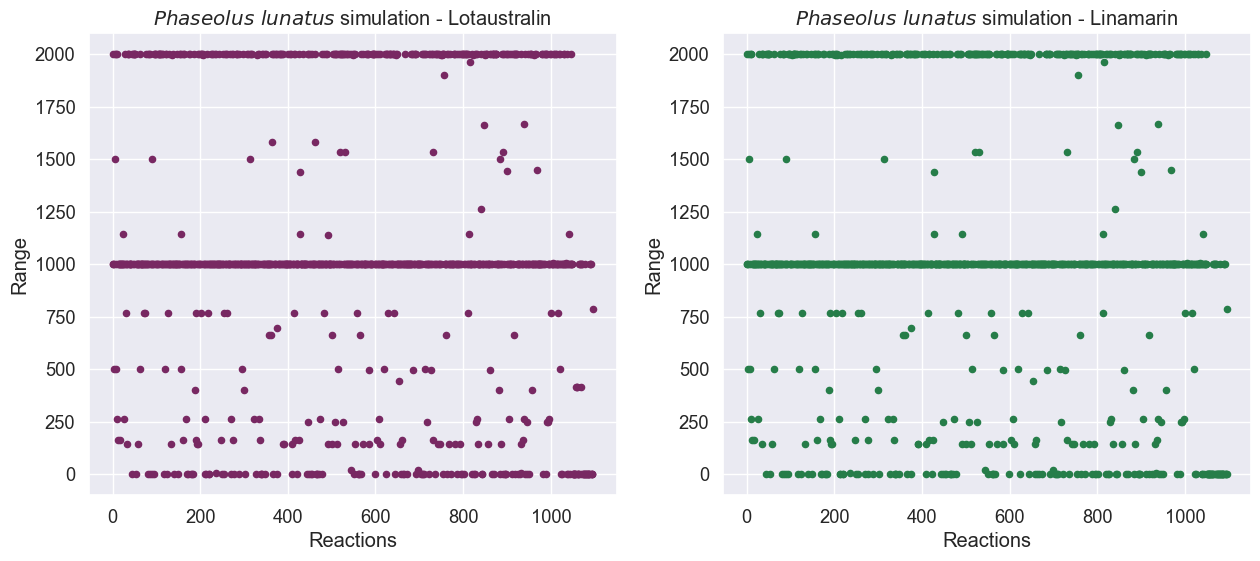

In [ ]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA\LINAMARIN

import matplotlib.pyplot as plt
import seaborn as sns
lengthpvul=list(range(len(Pvul_Day_Linamarin_magnitudes)))
# fig1,ax1=plt.subplots(figsize=(10, 6))
# ax1.scatter(lengthpvul, Pvul_Day_Linamarin_magnitudes.values(),color='#782862',s=10)
# #plt.savefig('scatternplot_Pvul_Day_Linamarin.jpg', dpi=300, bbox_inches='tight')

# Plun_Day_Linamarin_magnitudes=getMagnitude(plunDay_Linamarin)
# lengthplun=list(range(len(Plun_Day_Linamarin_magnitudes)))
# fig2,ax2=plt.subplots(figsize=(10, 6))
# ax2.scatter(lengthplun, Plun_Day_Linamarin_magnitudes.values(),color='#267D49',s=10)
# #plt.savefig('scatternplot_Plun_Day_Linamarin.jpg', dpi=300, bbox_inches='tight')

# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].scatter(lengthpvul, Plun_Day_Lotaustralin_magnitudes.values(), color='#782862', s=20)
axs[0].set_title(r'$\it{Phaseolus\ lunatus}$ simulation - Lotaustralin')
axs[0].set_xlabel('Reactions')
axs[0].set_ylabel('Range')

# Add the second plot to the second column of subplots
axs[1].scatter(lengthplun, Plun_Day_Linamarin_magnitudes.values(), color='#267D49', s=20)
axs[1].set_title(r'$\it{Phaseolus\ lunatus}$ simulation - Linamarin')
axs[1].set_xlabel('Reactions')
axs[1].set_ylabel('Range')

sns.set(font_scale=1.2)
plt.savefig('scatterplots_Pvul_Day_lotaustralin_4.0.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [290]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris
write_sbml_model(pvulModel, 'pvulModel_lotaustralin_fluxes.xml')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris


In [296]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA
sol=pvulModel.optimize()
df=pd.DataFrame(sol.fluxes)
df_to_csv=df.to_csv('FBA_fluxes_lotaustralin.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA
